In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 
import os #for interacting with os
import glob #to get a list of files matching a pattern

In [6]:
df_ayam = pd.read_csv('dataset-ayam.csv')
df_ikan = pd.read_csv('dataset-ikan.csv')
df_kambing = pd.read_csv('dataset-kambing.csv')
df_sapi = pd.read_csv('dataset-sapi.csv')
df_tahu = pd.read_csv('dataset-tahu.csv')
df_telur = pd.read_csv('dataset-telur.csv')
df_tempe = pd.read_csv('dataset-tempe.csv')
df_udang = pd.read_csv('dataset-udang.csv')

df = pd.concat([df_ikan,df_kambing,df_sapi,df_tahu,df_telur,df_tempe,df_udang])

In [7]:
df

,Title,Ingredients,Steps,Loves,URL
0,Gurame Saus Padang,Bahan utama:--1 ekor gurame--Bumbu untuk saus:...,Cuci bersih ikan gurame yang akan dimasak. Set...,2,/id/resep/4474009-gurame-saus-padang
1,Ikan Kembung Bakar Teflon,"1/2 kg ikan kembung sate, bersihkan--1 buah je...","Kucuri ikan dengan jeruk, diamkan 5 menit--Lum...",2,/id/resep/4474225-ikan-kembung-bakar-teflon
2,Mujaer asam pedas manis,1/2 kg ikan mujaer (stok gurame habis)--2 buah...,Bersihkan ikan sampai benar-benar bersih. Kera...,1,/id/resep/4473689-mujaer-asam-pedas-manis
3,Gurame Asam manis,1/2 kg ikan gurame--2 buah wortel (potong sepe...,Uleg kunir sama garam kasih air lalu guraminya...,5,/id/resep/4473428-gurame-asam-manis
4,Asam padeh ikan tuna,1/2 kg ikan tuna--6 siung bawang merah--4 siun...,"Haluskan bumbu (cabai merah, kemiri, bawang, k...",7,/id/resep/4473138-asam-padeh-ikan-tuna
...,...,...,...,...,...
1989,Udang saus mentega,1 kg udang segar--1 buah bawang bombay kecil--...,"Bersihkan udang, siapkan bahan bahan--Tumis ba...",46,/id/resep/3794442-udang-saus-mentega
1990,Jipang tumis udang,500 gr jipang(saya pk 6bh jipang muda yg kecil...,Tumis bawang merah bawang putih hingga harum.-...,6,/id/resep/3795267-jipang-tumis-udang
1991,Tumis Udang Tempe,3 siung bawang merah--3 siung bawang putih--2 ...,"Tiriskan bawang putih, bawang merah dan cabe l...",3,/id/resep/3794945-tumis-udang-tempe
1992,Tumis kacang panjang terong udang,"Stgah ikat kacang panjang,ku bli 3ribu d psr--...","Potong2 kacang panjang,terong cuci bersih sisi...",12,/id/resep/3794623-tumis-kacang-panjang-terong-...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13725 entries, 0 to 1993
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        13725 non-null  object
 1   Ingredients  13692 non-null  object
 2   Steps        13694 non-null  object
 3   Loves        13725 non-null  int64 
 4   URL          13725 non-null  object
dtypes: int64(1), object(4)
memory usage: 643.4+ KB


In [9]:
df.shape

(13725, 5)

In [10]:
#let's see the null values
a = df.isnull().sum()
print(a)

Title           0
Ingredients    33
Steps          31
Loves           0
URL             0
dtype: int64


Column Ingredients has 48 null values

the null values in column Ingredients:

In [11]:
df[df['Ingredients'].isnull()]

,Title,Ingredients,Steps,Loves,URL
194,[Notitle],NaN,NaN,0,/id/resep/3409967-sate-kambing-kecap-manis-sim...
256,[Notitle],NaN,NaN,0,/id/resep/3334665-nasi-goreng-daur-ulang-gule-...
259,[Notitle],NaN,NaN,0,/id/resep/3302954-gule-kambing-yummy
260,[Notitle],NaN,NaN,0,/id/resep/3302724-gulai-kambing
281,[Notitle],NaN,NaN,0,/id/resep/3298588-nasi-kebuli-kambing-kitaberbagi
636,[Notitle],NaN,NaN,0,/id/resep/3270914-nasgor-kambing-ala-kebon-sirih
682,[Notitle],NaN,NaN,0,/id/resep/3268926-sate-kambing
816,[Notitle],NaN,NaN,0,/id/resep/2465947-nasi-kebuli-kambing-ala-bund...
997,[Notitle],NaN,NaN,0,/id/resep/1132705-tongseng-kambing
1098,[Notitle],NaN,NaN,0,/id/resep/967173-daging-kambing-bumbu-kuning


Column Steps has 46 null values

the null values in column Steps:

In [12]:
df[df['Steps'].isnull()]

,Title,Ingredients,Steps,Loves,URL
194,[Notitle],NaN,NaN,0,/id/resep/3409967-sate-kambing-kecap-manis-sim...
256,[Notitle],NaN,NaN,0,/id/resep/3334665-nasi-goreng-daur-ulang-gule-...
259,[Notitle],NaN,NaN,0,/id/resep/3302954-gule-kambing-yummy
260,[Notitle],NaN,NaN,0,/id/resep/3302724-gulai-kambing
281,[Notitle],NaN,NaN,0,/id/resep/3298588-nasi-kebuli-kambing-kitaberbagi
636,[Notitle],NaN,NaN,0,/id/resep/3270914-nasgor-kambing-ala-kebon-sirih
682,[Notitle],NaN,NaN,0,/id/resep/3268926-sate-kambing
816,[Notitle],NaN,NaN,0,/id/resep/2465947-nasi-kebuli-kambing-ala-bund...
997,[Notitle],NaN,NaN,0,/id/resep/1132705-tongseng-kambing
1098,[Notitle],NaN,NaN,0,/id/resep/967173-daging-kambing-bumbu-kuning


If we notice, the column Title has '[NoTitle]' value:

In [13]:
df[df['Title'].str.contains('Notitle', case=True)]

,Title,Ingredients,Steps,Loves,URL
194,[Notitle],NaN,NaN,0,/id/resep/3409967-sate-kambing-kecap-manis-sim...
256,[Notitle],NaN,NaN,0,/id/resep/3334665-nasi-goreng-daur-ulang-gule-...
259,[Notitle],NaN,NaN,0,/id/resep/3302954-gule-kambing-yummy
260,[Notitle],NaN,NaN,0,/id/resep/3302724-gulai-kambing
281,[Notitle],NaN,NaN,0,/id/resep/3298588-nasi-kebuli-kambing-kitaberbagi
636,[Notitle],NaN,NaN,0,/id/resep/3270914-nasgor-kambing-ala-kebon-sirih
682,[Notitle],NaN,NaN,0,/id/resep/3268926-sate-kambing
816,[Notitle],NaN,NaN,0,/id/resep/2465947-nasi-kebuli-kambing-ala-bund...
997,[Notitle],NaN,NaN,0,/id/resep/1132705-tongseng-kambing
1098,[Notitle],NaN,NaN,0,/id/resep/967173-daging-kambing-bumbu-kuning


In [14]:
df[df['Title'].str.contains('Notitle', case=True)]

,Title,Ingredients,Steps,Loves,URL
194,[Notitle],NaN,NaN,0,/id/resep/3409967-sate-kambing-kecap-manis-sim...
256,[Notitle],NaN,NaN,0,/id/resep/3334665-nasi-goreng-daur-ulang-gule-...
259,[Notitle],NaN,NaN,0,/id/resep/3302954-gule-kambing-yummy
260,[Notitle],NaN,NaN,0,/id/resep/3302724-gulai-kambing
281,[Notitle],NaN,NaN,0,/id/resep/3298588-nasi-kebuli-kambing-kitaberbagi
636,[Notitle],NaN,NaN,0,/id/resep/3270914-nasgor-kambing-ala-kebon-sirih
682,[Notitle],NaN,NaN,0,/id/resep/3268926-sate-kambing
816,[Notitle],NaN,NaN,0,/id/resep/2465947-nasi-kebuli-kambing-ala-bund...
997,[Notitle],NaN,NaN,0,/id/resep/1132705-tongseng-kambing
1098,[Notitle],NaN,NaN,0,/id/resep/967173-daging-kambing-bumbu-kuning


Change the null value in column Ingredients:

In [15]:
df['Ingredients'].fillna('NoIngrediens', inplace=True)

C:\Users\Ramdhan\AppData\Local\Temp\ipykernel_7696\3866677759.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ingredients'].fillna('NoIngrediens', inplace=True)


In [16]:
df.isnull().sum()

Title           0
Ingredients     0
Steps          31
Loves           0
URL             0
dtype: int64

In [17]:
df['Steps'].fillna('NoSteps', inplace=True)

C:\Users\Ramdhan\AppData\Local\Temp\ipykernel_7696\2870002932.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Steps'].fillna('NoSteps', inplace=True)


In [18]:
df.isnull().sum()

Title          0
Ingredients    0
Steps          0
Loves          0
URL            0
dtype: int64

Modify the dataframe to support visualization:

create a new column from how many separators "--" to make number of ingredients column (numberof_Ingredients)

In [19]:
df['numberof_Ingredients'] = df['Ingredients'].str.count('--')

create a new column from how many separators "--" to make number of Steps column (numberof_Steps)

In [20]:
df['numberof_Steps'] = df['Steps'].str.count('--')

In [21]:
df.head(10)

,Title,Ingredients,Steps,Loves,URL,numberof_Ingredients,numberof_Steps
0,Gurame Saus Padang,Bahan utama:--1 ekor gurame--Bumbu untuk saus:...,Cuci bersih ikan gurame yang akan dimasak. Set...,2,/id/resep/4474009-gurame-saus-padang,25,8
1,Ikan Kembung Bakar Teflon,"1/2 kg ikan kembung sate, bersihkan--1 buah je...","Kucuri ikan dengan jeruk, diamkan 5 menit--Lum...",2,/id/resep/4474225-ikan-kembung-bakar-teflon,5,5
2,Mujaer asam pedas manis,1/2 kg ikan mujaer (stok gurame habis)--2 buah...,Bersihkan ikan sampai benar-benar bersih. Kera...,1,/id/resep/4473689-mujaer-asam-pedas-manis,13,7
3,Gurame Asam manis,1/2 kg ikan gurame--2 buah wortel (potong sepe...,Uleg kunir sama garam kasih air lalu guraminya...,5,/id/resep/4473428-gurame-asam-manis,14,3
4,Asam padeh ikan tuna,1/2 kg ikan tuna--6 siung bawang merah--4 siun...,"Haluskan bumbu (cabai merah, kemiri, bawang, k...",7,/id/resep/4473138-asam-padeh-ikan-tuna,16,9
5,Avocado Tuna Salad,1 kaleng Tuna Chunks--2 butir telur rebus--3 b...,"Campur semuanya dalam baskom, kecuali biji zai...",0,/id/resep/4473223-avocado-tuna-salad,9,2
6,Lele Asam Manis,1/2 kg Lele Segar--180 ml air--3 sdm kecap man...,"Cuci bersihbikan, lalu goreng ikan lele agak m...",0,/id/resep/4473217-lele-asam-manis,13,6
7,Pempek kulit ikan tenggiri,500 gr kulit ikan tenggiri halu--200 cc air ma...,Aduk ikan tambahkan air sedikit demi sedikit b...,6,/id/resep/4472657-pempek-kulit-ikan-tenggiri,12,9
8,Tumis Tongkol Petai,2 bungkus tongkol--2 cabe gendot--2 papan peta...,"Cuci bersih ikan tongkol, goreng sebentar--Iri...",6,/id/resep/4472513-tumis-tongkol-petai,10,3
9,Ikan Patin pedas manis,500 gr ikan patin--5 siung bawang merah iris t...,"Ikan patin yang sudah dicuci bersih, dilumuri ...",0,/id/resep/4472909-ikan-patin-pedas-manis,10,5


# **VISUALIZATION**

C:\Users\Ramdhan\AppData\Local\Temp\ipykernel_7696\36630986.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(y=df.sort_values(by='Loves', ascending=False).head(10).Title,
c:\Users\Ramdhan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128537 (\N{KISSING FACE WITH SMILING EYES}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Ramdhan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128076 (\N{OK HAND SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Ramdhan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Ramdhan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170:

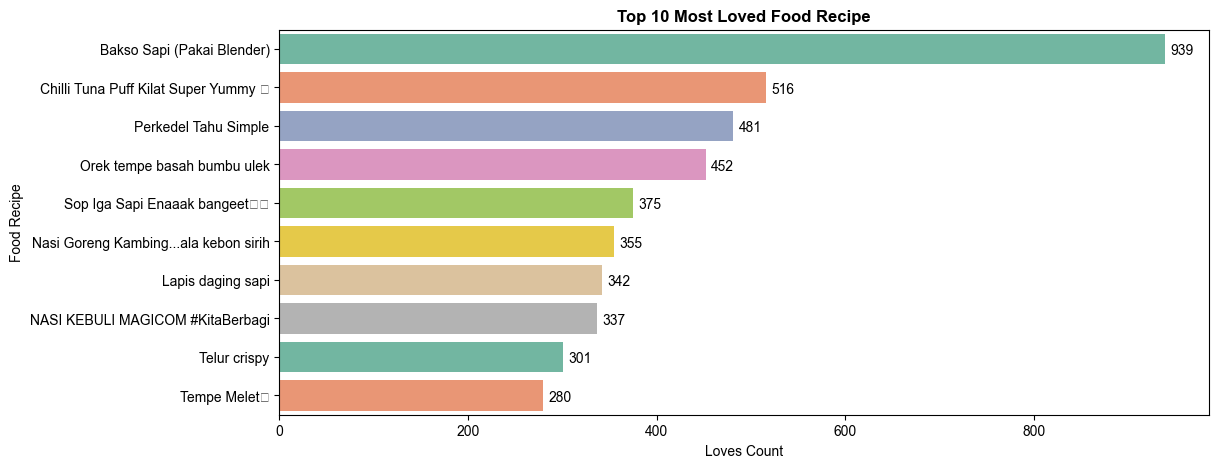

In [22]:
plt.figure(figsize=(12,5))

ax=sns.barplot(y=df.sort_values(by='Loves', ascending=False).head(10).Title,
            x=df.sort_values(by='Loves', ascending=False).head(10).Loves,
           palette='Set2')

for p in ax.patches:
    width = p.get_width()
    plt.text(18+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

sns.set(style='darkgrid')

plt.xticks()

plt.xlabel('Loves Count')
plt.ylabel('Food Recipe')
plt.title('Top 10 Most Loved Food Recipe', fontweight="bold")
plt.show()

C:\Users\Ramdhan\AppData\Local\Temp\ipykernel_7696\66578064.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=df.sort_values(by='numberof_Ingredients', ascending=False).head(10).Title,
c:\Users\Ramdhan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128513 (\N{GRINNING FACE WITH SMILING EYES}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


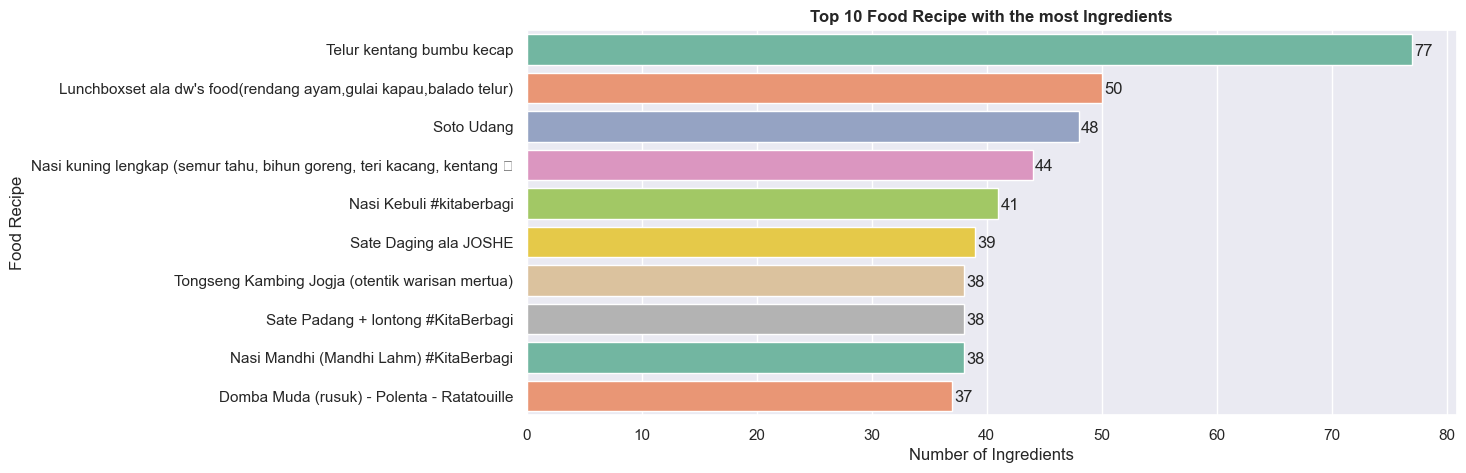

In [23]:
plt.figure(figsize=(12,5))

ax = sns.barplot(y=df.sort_values(by='numberof_Ingredients', ascending=False).head(10).Title,
                 x=df.sort_values(by='numberof_Ingredients', ascending=False).head(10).numberof_Ingredients,
                palette='Set2')

for p in ax.patches:
    width = p.get_width()
    plt.text(1+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

sns.set(style='darkgrid')

plt.xticks()

plt.title('Top 10 Food Recipe with the most Ingredients', fontweight='bold')
plt.xlabel('Number of Ingredients')
plt.ylabel('Food Recipe')
plt.show()

C:\Users\Ramdhan\AppData\Local\Temp\ipykernel_7696\773552322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(y=df.sort_values(by='numberof_Steps', ascending=False).head(10).Title,


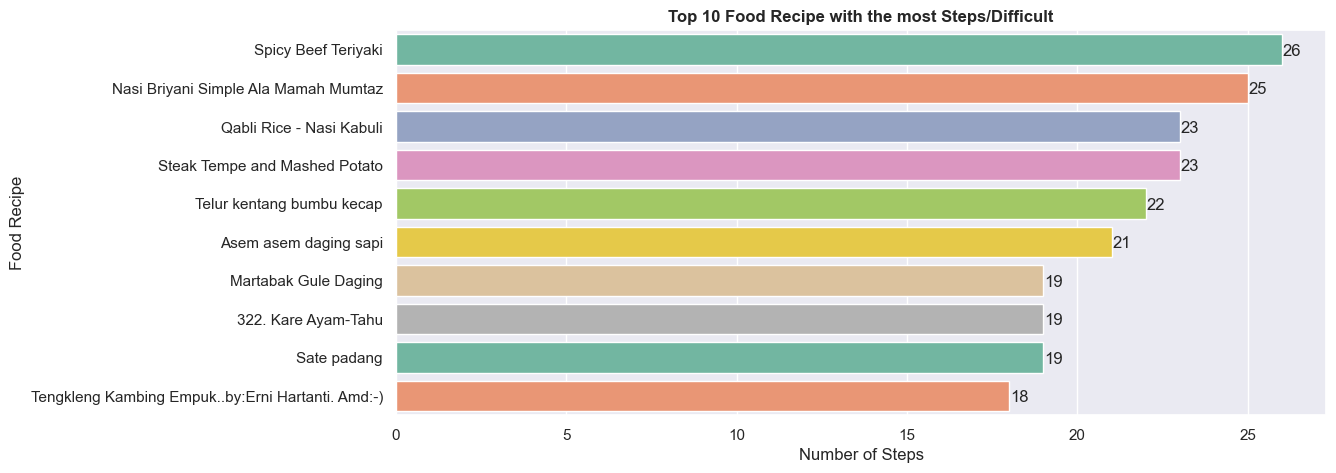

In [24]:
plt.figure(figsize=(12,5))

ax=sns.barplot(y=df.sort_values(by='numberof_Steps', ascending=False).head(10).Title,
              x=df.sort_values(by='numberof_Steps', ascending=False).head(10).numberof_Steps,
              palette='Set2')

for p in ax.patches:
    width = p.get_width()
    plt.text(0.3+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

sns.set(style='darkgrid')

plt.xticks()

plt.title('Top 10 Food Recipe with the most Steps/Difficult', fontweight='bold')
plt.xlabel('Number of Steps')
plt.ylabel('Food Recipe')
plt.show()

**Most mentioned words in Ingredients:**

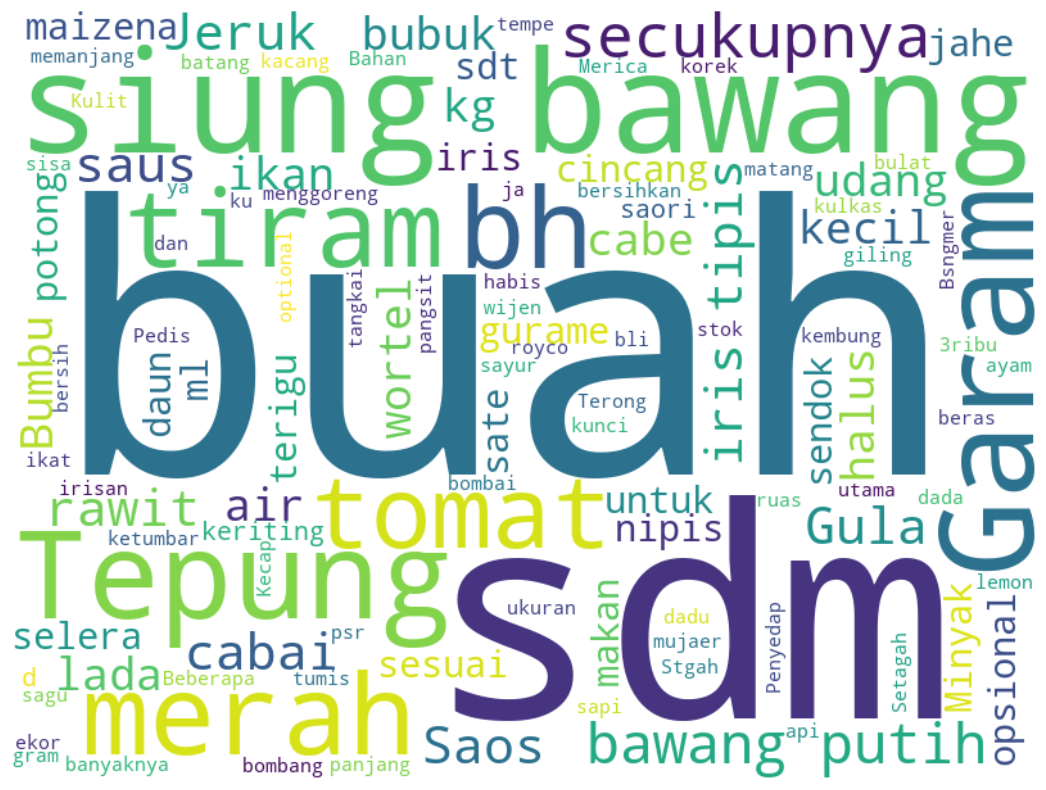

In [25]:
text = df['Ingredients'].values

wordcloud = WordCloud(width = 800, height = 600,
            background_color ='white').generate(str(text))

plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

**Most mentioned words in Steps:**

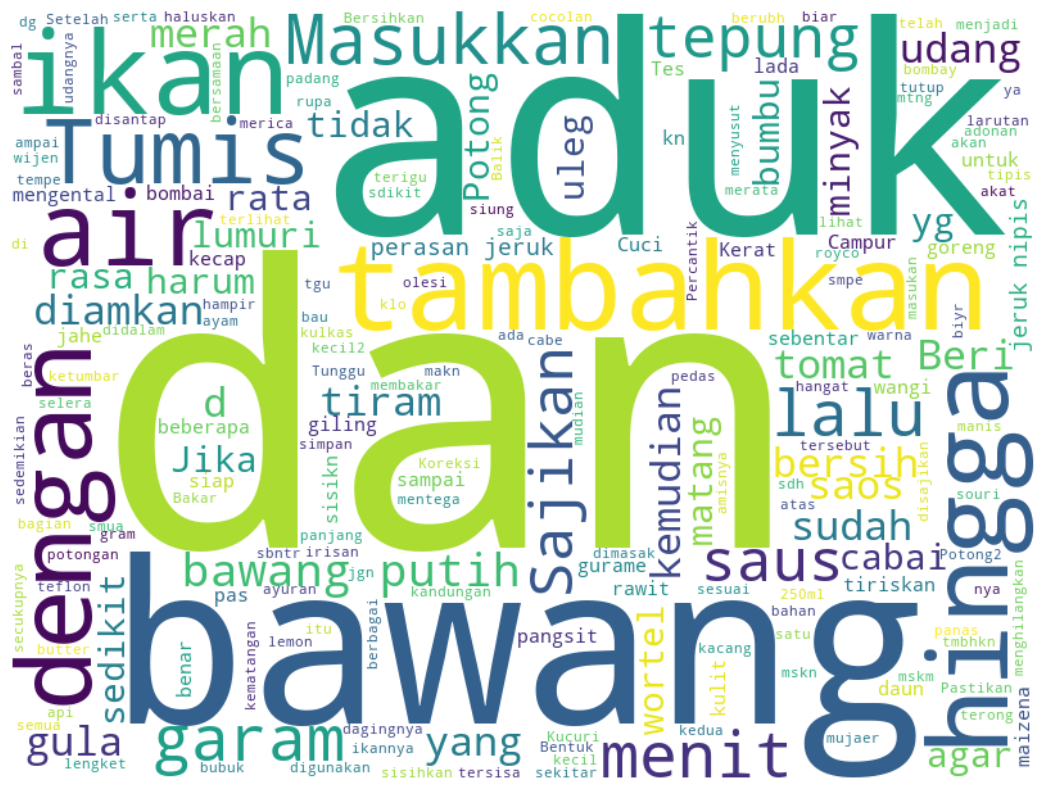

In [26]:
text = df['Steps'].values

wordcloud = WordCloud(width = 800, height = 600,
                     background_color='white').generate(str(text))

plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()